<a id="pb"> </a>
## 1.Problem Statement
The project aims at finding the life expectancy of a person residing in a country by taking into account factors like mortality rates,immunization and demographic factors using KNN regression model.The data has been collected between 2000 and 2015 by WHO and United Nation jointly.


<a id="dd"></a>
## 2.Data Definition

#### Label is Life Expectency

**Country :** Country of residence of person (193 unique values)(Categoric)

**Year :** Year in which data is collected(Numeric)

**Status:** Developed, developing or underdeveloped (Categoric)

**Life expectancy:** Average life expectancy in years (Numeric)

**Adult mortality rate:** Probablity of dying between 15 and 60 years per 100( Numeric)

**Infant deaths:** Number of infant deaths per 1000 population (Numeric)

**Alcohol:** Recorder per capita(15+) in litre of pure alcohol (Numeric)

**percentage expenditure:** Expenditure on health as a percentage of Gross Domestic Product (Numeric)

**Hepatitis B:** Immunization coverage among 1- years -olds in percentage (Numeric)

**Measles:** Number of reported cases per 1000 population (Numeric)

**BMI:** Body mass index (Numeric)

**under-five deaths:** Number indicating deaths under the age of 5(Numeric)

**Total expenditure:** Total amount spended (Numeric)

**Diptheria :** Immunization coverage against Diptheria (Numeric)

**HIV/AIDS:** Persons out of 1000 having HIV/AIDS (Numeric)

**GDP:** Gross domestic product of the country (Numeric)

**Population:** Total population of the country (Numeric)

**Thinness 1-19 years:** A BMI measure for 1-19 years age (Numeric)

**Thinness 5-9 years:** A BMI measure for 5-19 years age (Numeric)

**Income composition of resources:** Income composition of resources (Numeric)

**Schooling :**  Total number of people out of 1000 completing schooling (Numeric)

In [1]:
#for dataframe maulpulations and calculations
import pandas as pd
import numpy as np
#for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
#for knn, linear regression and decision tree algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#to get consistent results.
import random
random.seed(0)

<a id="ed"></a>
## 4.Exploring the Dataset

In [2]:
#Reading the file
data=pd.read_csv('Life_Expectency.csv')

#data preview
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
#Finding number of rows and columns
data.shape

(2938, 22)

In [4]:
# to get count,null values and data type in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# to know properties of data 
data.describe

<bound method NDFrame.describe of           Country  Year      Status  Life expectancy   Adult Mortality   
0     Afghanistan  2015  Developing              65.0            263.0  \
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   

### Inference- 
The dataset contains 2938 rows and 22 columns and the rows to columns ratio is adequate.

In [6]:
# modifying data columns and removing spaces from them
data.columns=['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five-deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [7]:
#changing year to object to avoid time complexity.
data['Year'] = data['Year'].astype('object')

In [8]:
# to see sum of count of null values
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five-deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

### Univariate Analysis

Text(0.5, 1.0, 'Distribution of Numerical columns')

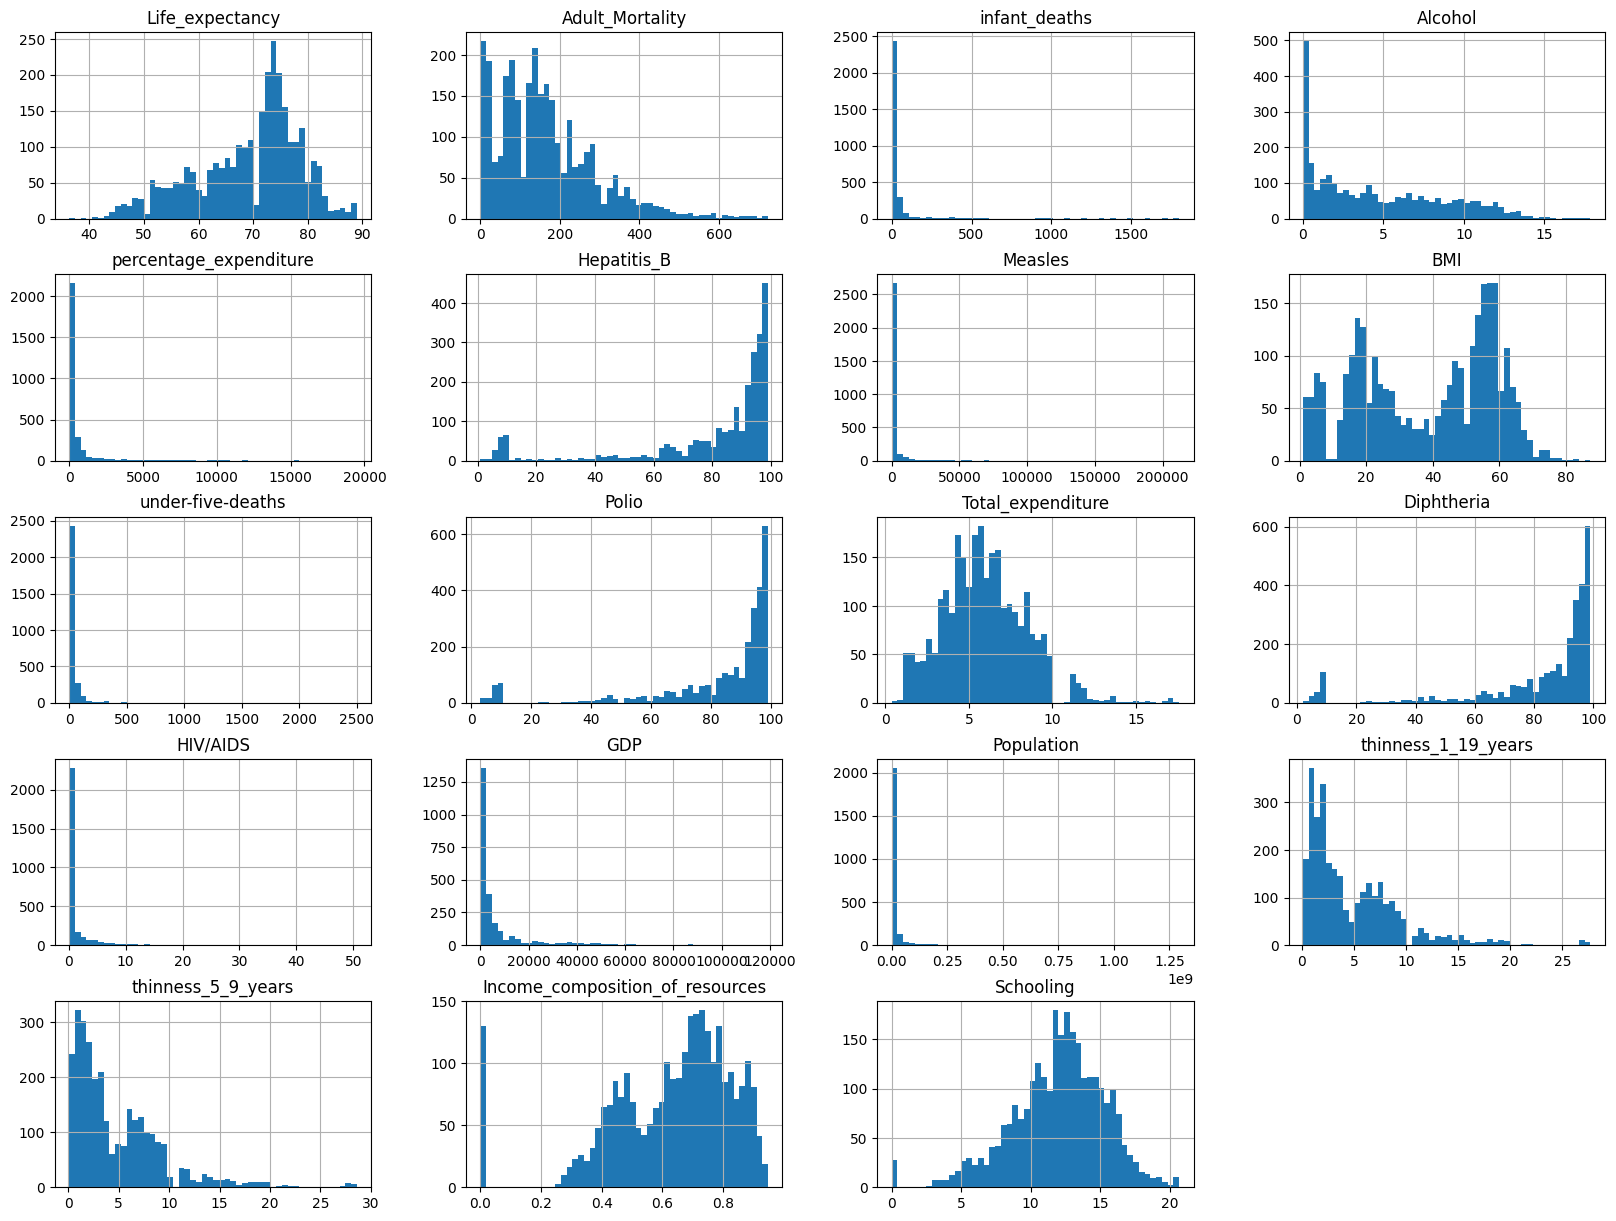

In [9]:
#Q: What is the distribution of the numerical columns?
# to see distribution of variables histogram is plotted
df=data.select_dtypes(include='number')
df.hist(bins=50,figsize=(20,15))
plt.title('Distribution of Numerical columns')
#most of the columns in the data is normally distributed.

Text(0.5, 1.0, 'Country Status')

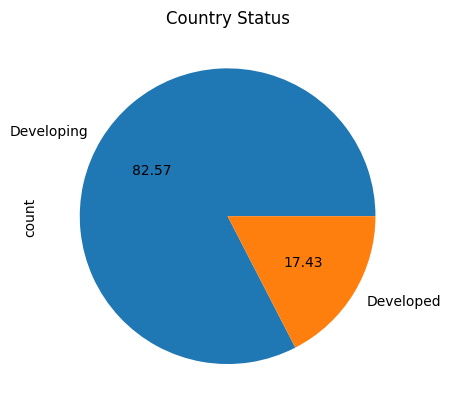

In [10]:
#Q:Are status of the status is evenly divided?
data.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Country Status')

#count of developing is far more than developed countries.

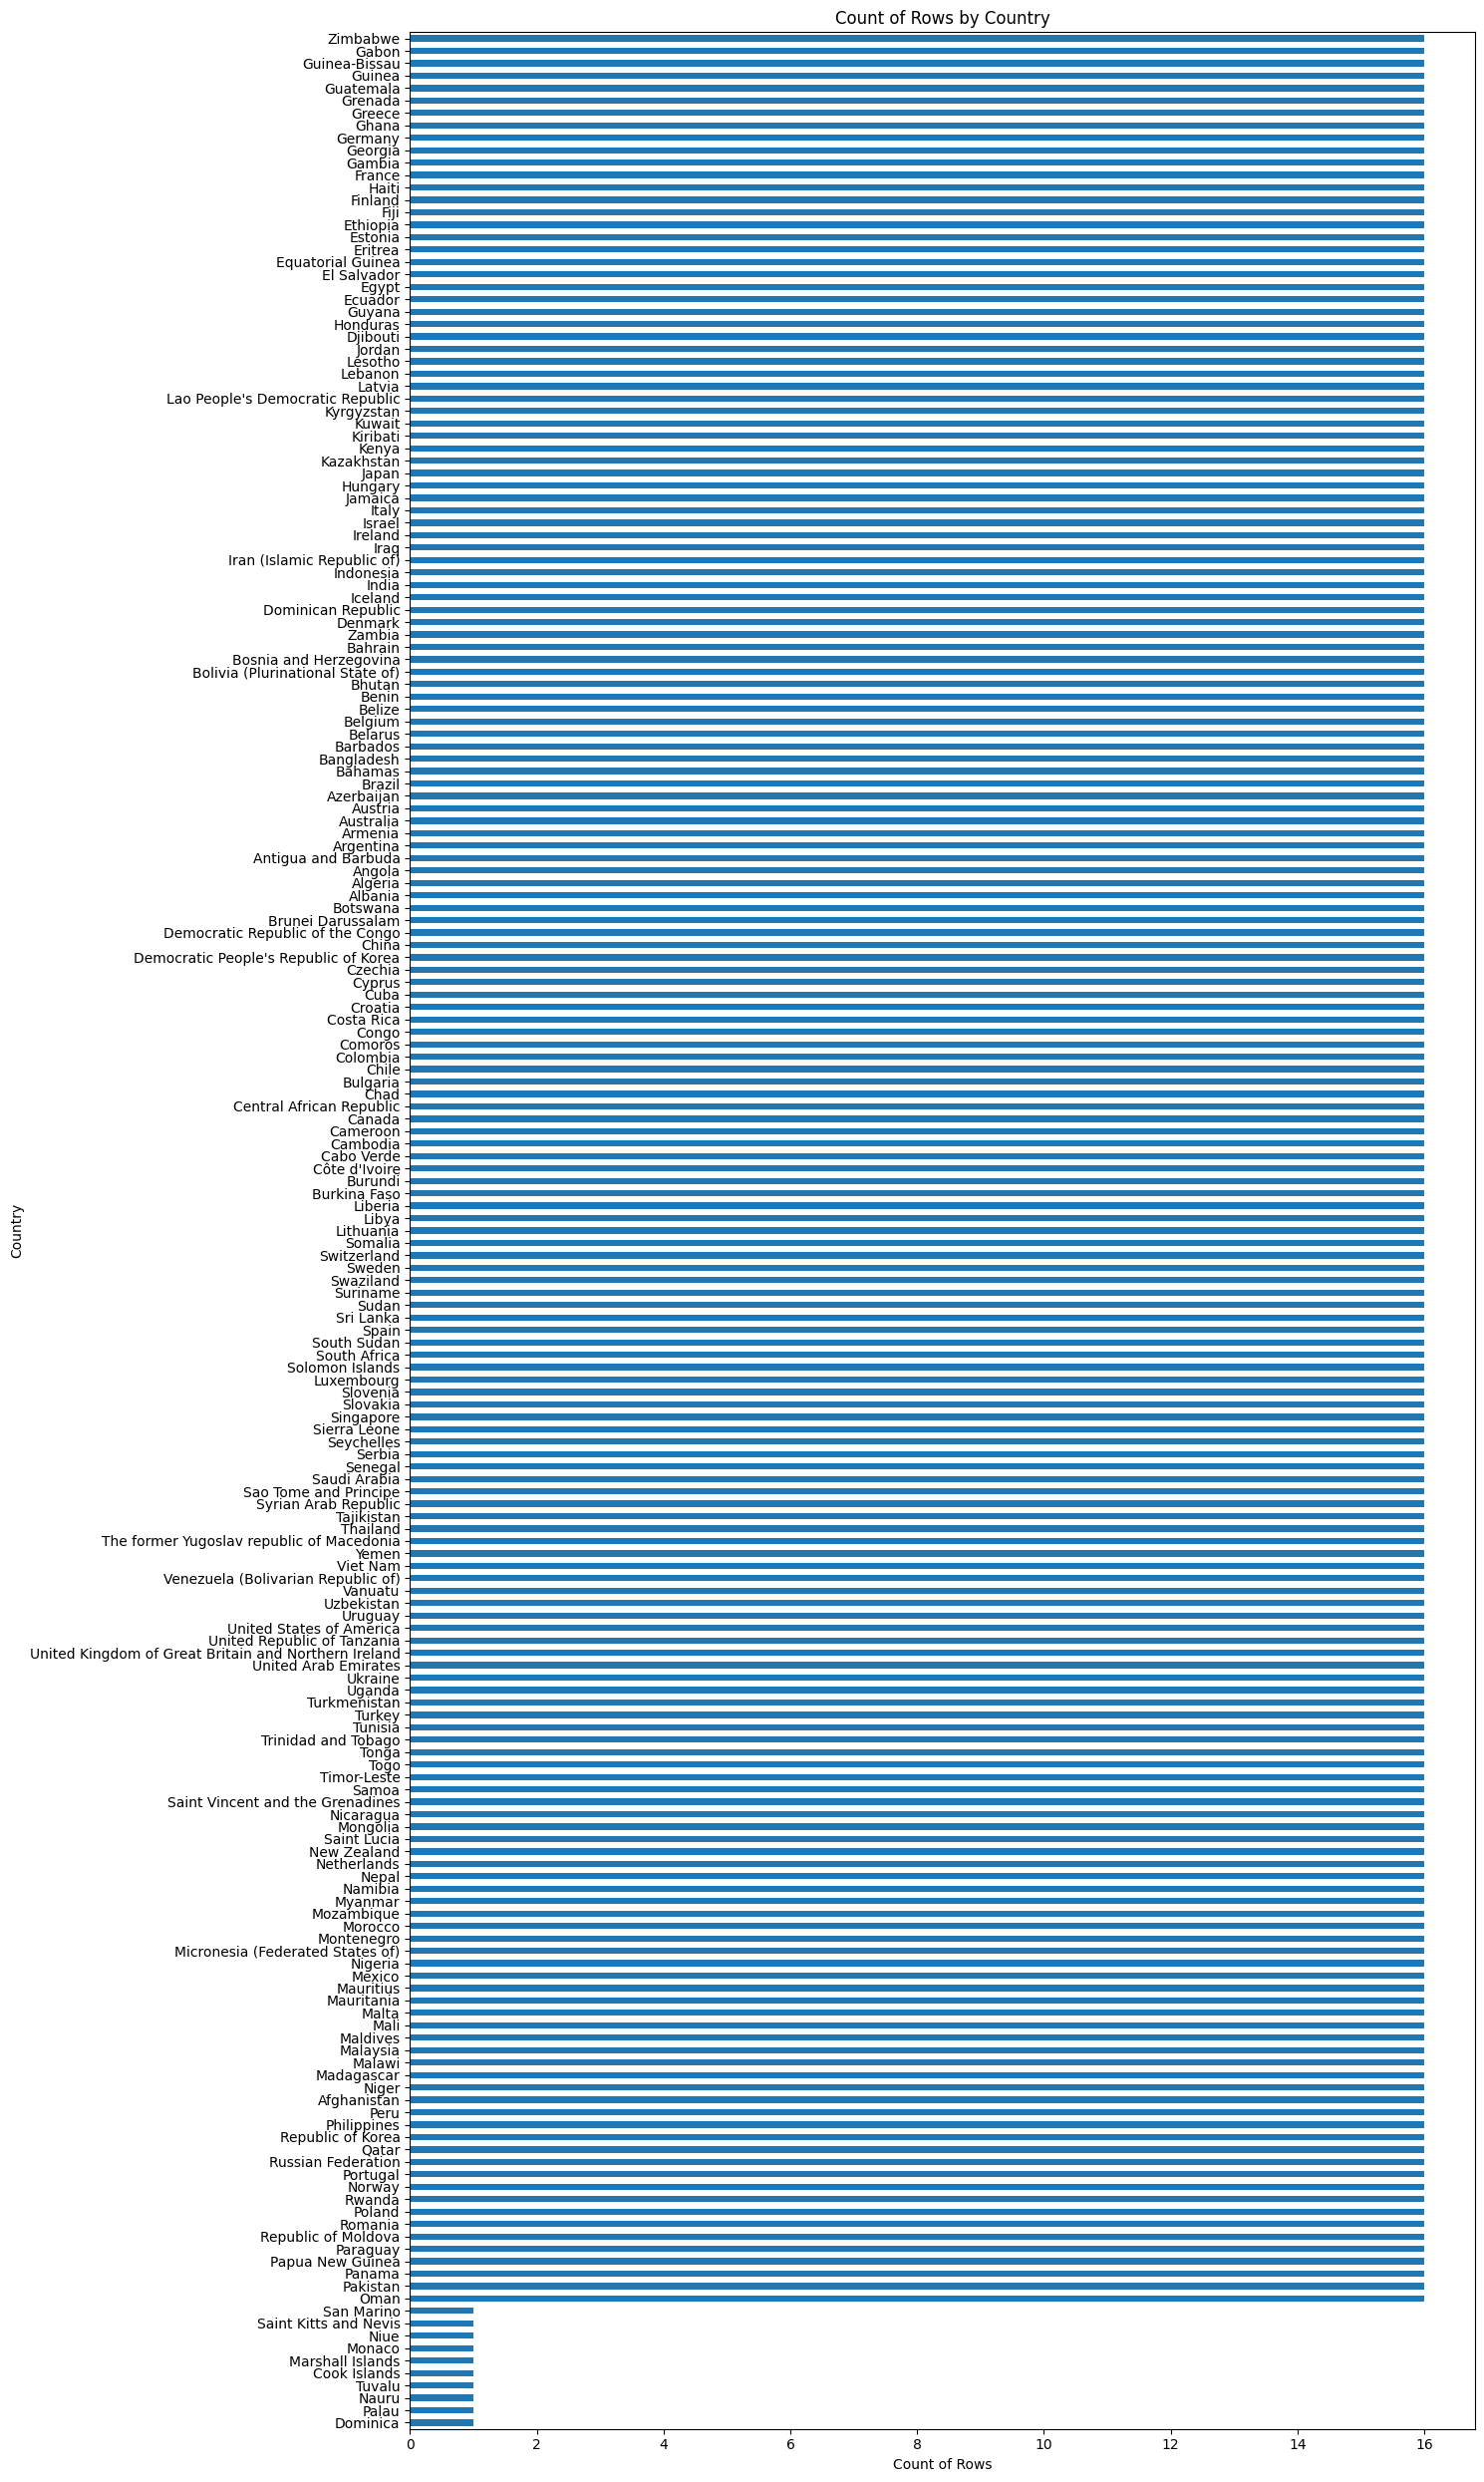

In [11]:
#Q: Are the data for all the countries equally given?
plt.figure(figsize=(15, 25))
data.Country.value_counts(ascending=True).plot(kind='barh')
plt.title('Count of Rows by Country')
plt.xlabel('Count of Rows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
#Yes, for most of the countries it is equal with row count of 16, but for few countries like san marino etc have row count of 1.
#None of the countries are over represented.

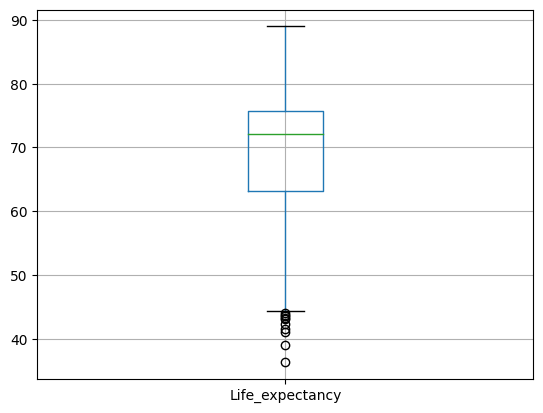

In [12]:
#Q: what is the distribution of label columns
life=pd.DataFrame(data.iloc[:,3])
life.boxplot();
#outliers are present on lower end.

### Findings & Inferences:

1. 

## Bivariate Analysis

Text(0.5, 1.0, 'CORRELATION IN THE DATA')

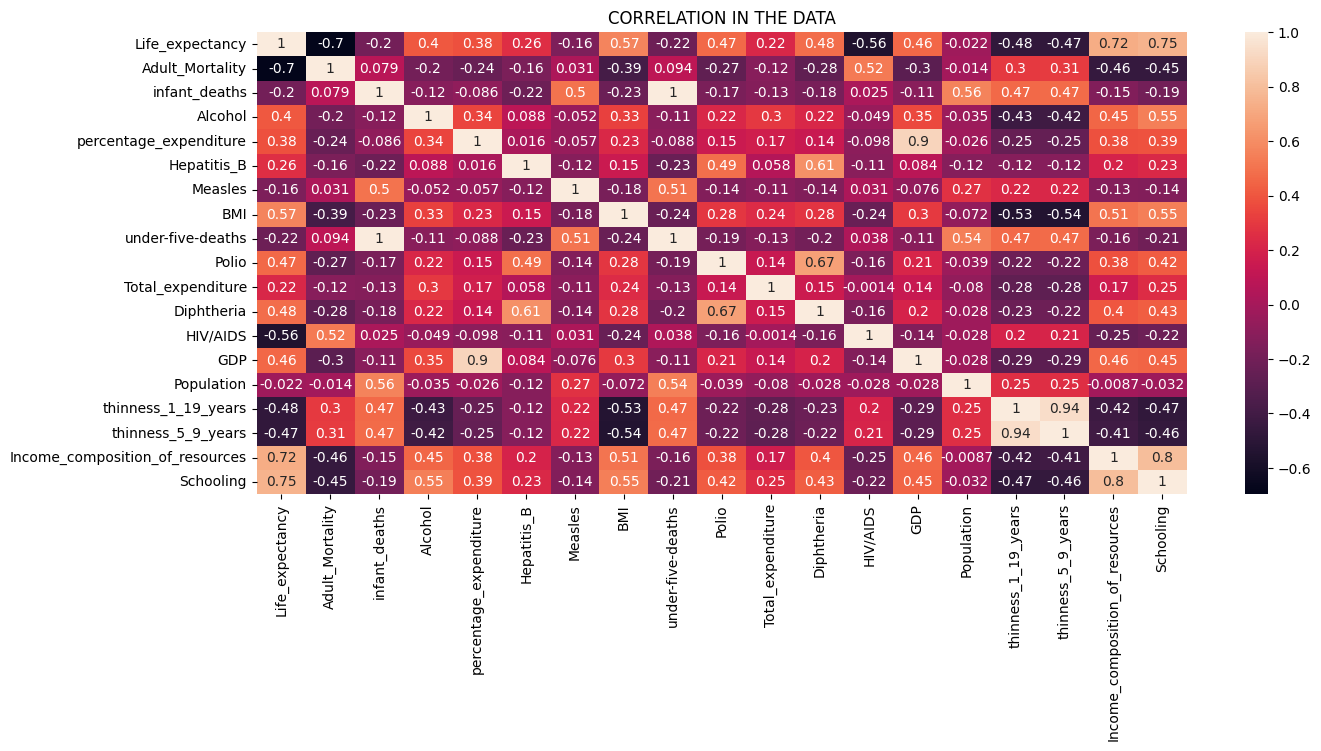

In [13]:
#Q: are all columns equally important to life expectency?
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(15,6))
sns.heatmap(numeric_data.corr(),annot=True, fmt='.2g')
plt.title('CORRELATION IN THE DATA')
#columns like adult mortaolity,infant deaths, bmi seems important

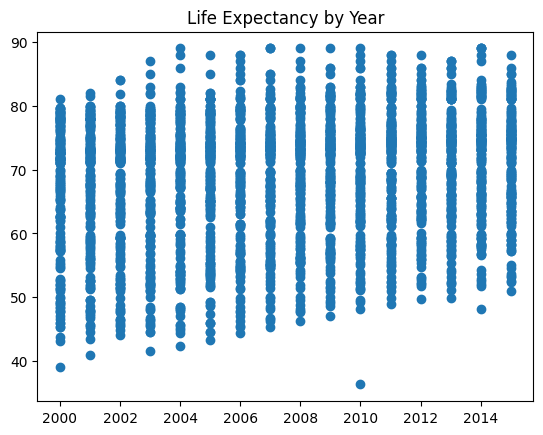

In [14]:
#Q:what is trend between Year and life_expectency?
plt.scatter(x=data['Year'],y=data['Life_expectancy'])
plt.title('Life Expectancy by Year')
plt.show()

Text(0.5, 1.0, 'Trend By Year')

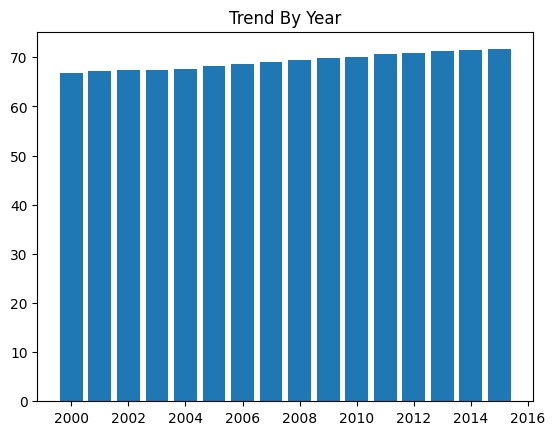

In [15]:
#Q: Is avg life expectency increasing year wise?
ht = data["Life_expectancy"].groupby(data['Year']).mean().values
indx = data["Life_expectancy"].groupby(data['Year']).mean().index
plt.bar(x=indx, height=ht)
plt.title('Trend By Year')
#appears to be positive over time but not increasing significantly.

In [16]:
#extracting data about india.
india=data.iloc[1187:1202,:]
india.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4


Text(0.5, 1.0, 'Trends for India over Years')

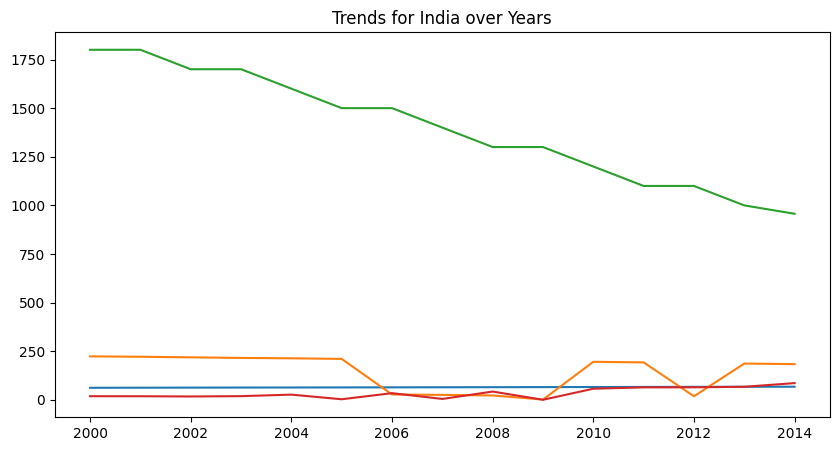

In [17]:
#Trends of various features with respect to india.
plt.figure(figsize=(10,5))
plt.plot(india['Year'],india['Life_expectancy'],label = 'LifeExpectancy')
plt.plot(india['Year'],india['Adult_Mortality'])
plt.plot(india['Year'],india['infant_deaths'])
plt.plot(india['Year'],india['percentage_expenditure'])
plt.title('Trends for India over Years')

In [18]:
india_df = data[data['Country'] == 'India']

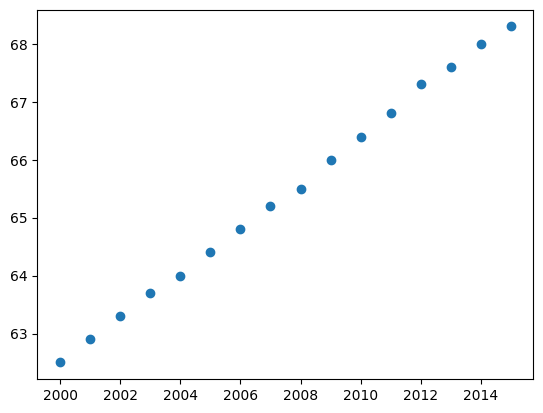

In [19]:
#Q: How average life expectency varies for india? 
plt.scatter(india_df['Year'],india_df['Life_expectancy'])
#increasing constantly.

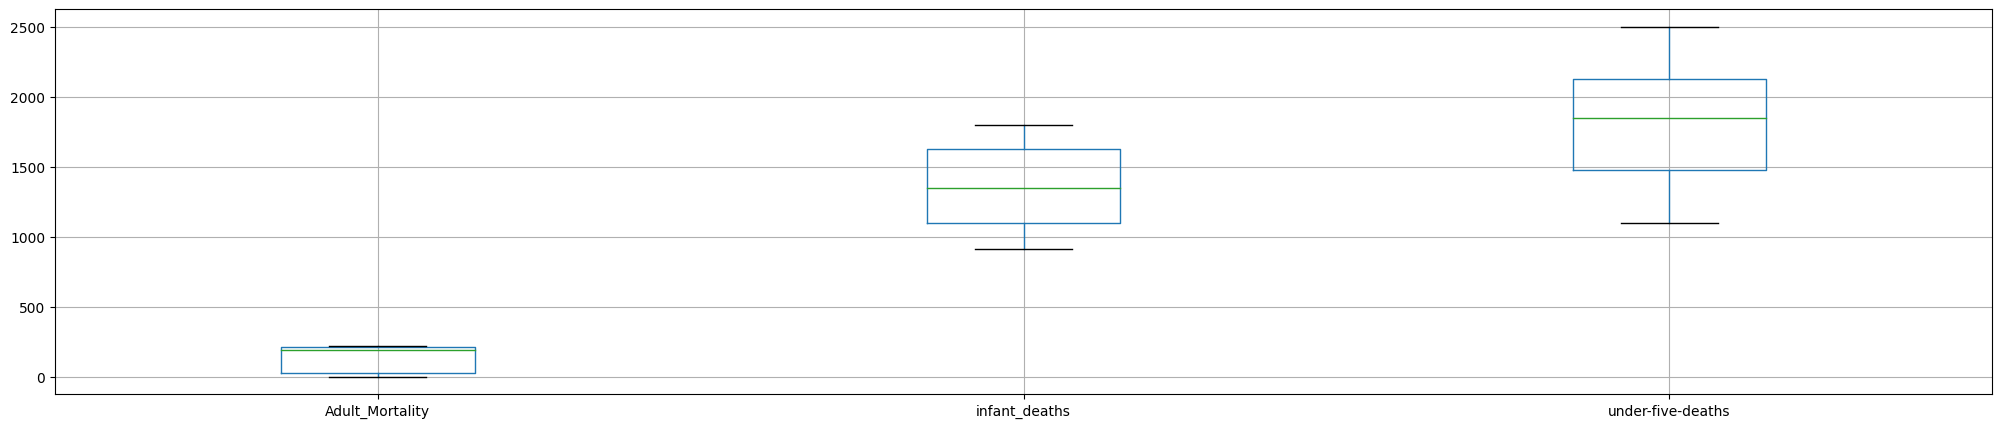

In [20]:
# distribution of features of high correlation with respect to india?
plt.figure(figsize=(25,5))
india_df[['Adult_Mortality','infant_deaths','under-five-deaths']].boxplot();

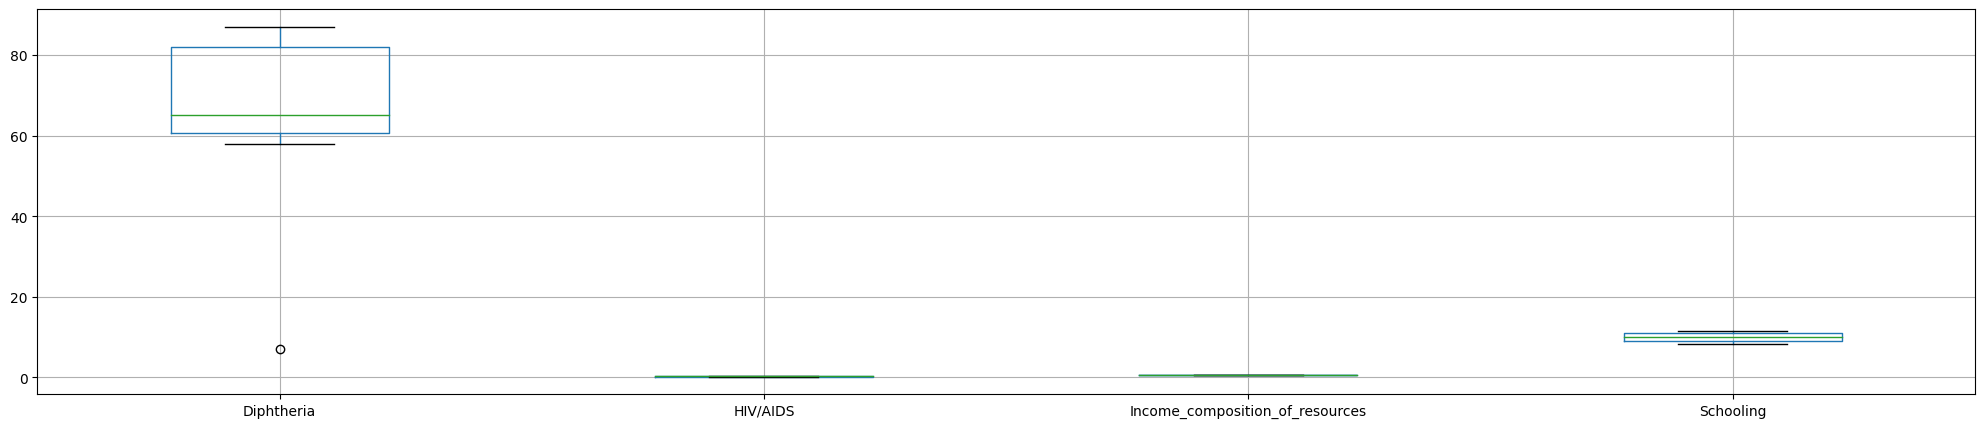

In [21]:
plt.figure(figsize=(25,5))
india_df[['Diphtheria','HIV/AIDS','Income_composition_of_resources','Schooling']].boxplot();

#### Comparison of India with Top 5 GDP in the world:

In [22]:
#selecting india, usa , uk, japan, china and germany.
#comparison on life expectency.
plt.figure(figsize=(25,5))
country = data[data['Country'].isin(['India', 'United States of America', 'China','Germany','United Kingdom of Great Britain and Northern Ireland','Japan'])]
country.groupby('Country').mean()[['Life_expectancy']].plot.barh(rot=0)
plt.title('Comparison on life expectency')

TypeError: Could not convert DevelopingDevelopingDevelopingDevelopingDevelopingDevelopingDevelopingDevelopingDevelopingDevelopingDevelopingDevelopingDevelopingDevelopingDevelopingDeveloping to numeric

<Figure size 2500x500 with 0 Axes>

In [ ]:
#comparing different mortality rate.
country.groupby('Country').mean()[['Adult_Mortality','infant_deaths','under-five-deaths']].plot.barh(rot=0)
plt.title('Comparing different mortality rate')

In [ ]:
data.columns

In [ ]:
#comparing different Diseases.
country.groupby('Country').mean()[['Hepatitis_B','Polio','Measles','Diphtheria','HIV/AIDS']].plot.barh(rot=0)
plt.title('Comparing different Diseases')

In [ ]:
#comparing different lifestyle features.
country.groupby('Country').mean()[['Alcohol','BMI','Total_expenditure','Schooling']].plot.barh(rot=0)
plt.title('Comparing different Lifestyle Features')

## Hypothesis Testing

In [ ]:
from scipy import stats
#step1: stating the hypothesis.
#H0=72.6
#H1<>72.6
print('Hypothesised mean: 72.6')


#step2: collecting required stats
#calculating mean
mu=data['Life_expectancy'].mean()
print('Sample mean: ',round(mu,3))

#calculating standard deviation
std=df['Life_expectancy'].std()
print('Sample standard deviation: ',round(std,3))

#sample size
print('Sample size: ',data.shape[0])


#defining alpha or rejection zone
alpha=0.05

#step3: calculating z_critical.
z_critical_lower=stats.norm.ppf(alpha/2)
z_critical_upper=stats.norm.isf(alpha/2)
print('z_critical_lower',z_critical_lower)
print('z_critical_upper',z_critical_upper)


#step4:calculating sample statistic
n = data.shape[0]
z = (mu - 72.6)/(std/np.sqrt(n))
print('Critical Value: ',z)

#step5: area under the curve i.e p value
#area to the right
area=stats.norm.cdf(z)
print('Area: ',area)

#Step6: declaring the result
if area<z_critical_upper:
    print('Null Hypothesis is Retained!')
else: 
    print('Null hypothesis is Rejected!')

In [ ]:
data.isna().sum()

In [ ]:
# filling missing values with median

data['Life_expectancy'].fillna(data['Life_expectancy'].median(),inplace=True)
data['Adult_Mortality'].fillna(data['Adult_Mortality'].median(),inplace=True)
data['Alcohol'].fillna(data['Alcohol'].median(),inplace=True)
data['Hepatitis_B'].fillna(data['Hepatitis_B'].median(),inplace=True)
data['BMI'].fillna(data['BMI'].median(),inplace=True)
data['Polio'].fillna(data['Polio'].median(),inplace=True)
data['Total_expenditure'].fillna(data['Total_expenditure'].median(),inplace=True)
data['Diphtheria'].fillna(data['Diphtheria'].median(),inplace=True)
data['Population'].fillna(data['Population'].median(),inplace=True)
data['GDP'].fillna(data['GDP'].median(),inplace=True)
data['thinness_1_19_years'].fillna(data['thinness_1_19_years'].median(),inplace=True)
data['thinness_5_9_years'].fillna(data['thinness_5_9_years'].median(),inplace=True)
data['Income_composition_of_resources'].fillna(data['Income_composition_of_resources'].median(),inplace=True)
data['Schooling'].fillna(data['Schooling'].median(),inplace=True)

In [ ]:
#data preparation

In [ ]:
df_cat=data.select_dtypes(include='object')
df_cat

In [ ]:
df_num=data.select_dtypes(include='number')
df_num

In [ ]:
Q3 = df_num.quantile(0.75)
Q1 = df_num.quantile(0.25)
IQR = Q3 - Q1


# ~ represents NOT or Exclude such rows
data=data[~((df_num < (Q1 - 3 * IQR)) |(df_num > (Q3 + 3 * IQR))).any(axis=1)]
data.shape

In [ ]:
df_num.corr()